### Exercise 3: SUPERVISED LEARNING

In [16]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import time


##### Load the Indian Liver Patient Dataset (UCI Machine Learning Repository). Preview the first 5 rows to see the structure of the dataset.

In [2]:
ilpd = fetch_ucirepo(id=225)
features = ilpd.data.features
targets = ilpd.data.targets
ilpd_df = pd.concat([features, targets], axis=1, ignore_index=False)
ilpd_df.head(5)

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [14]:
ilpd_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 579 entries, 0 to 582
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        579 non-null    int64  
 1   Gender     579 non-null    int32  
 2   TB         579 non-null    float64
 3   DB         579 non-null    float64
 4   Alkphos    579 non-null    int64  
 5   Sgpt       579 non-null    int64  
 6   Sgot       579 non-null    int64  
 7   TP         579 non-null    float64
 8   ALB        579 non-null    float64
 9   A/G Ratio  579 non-null    float64
 10  Selector   579 non-null    int64  
dtypes: float64(5), int32(1), int64(5)
memory usage: 52.0 KB


In [12]:
ilpd_df.describe()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,0.758204,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,0.284974
std,16.221786,0.428542,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,0.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [3]:
ilpd_df.isnull().sum()

Age          0
Gender       0
TB           0
DB           0
Alkphos      0
Sgpt         0
Sgot         0
TP           0
ALB          0
A/G Ratio    4
Selector     0
dtype: int64

##### Prepare the data for training such as handling missing values.

In [10]:
ilpd_df = ilpd_df.dropna(how='any')

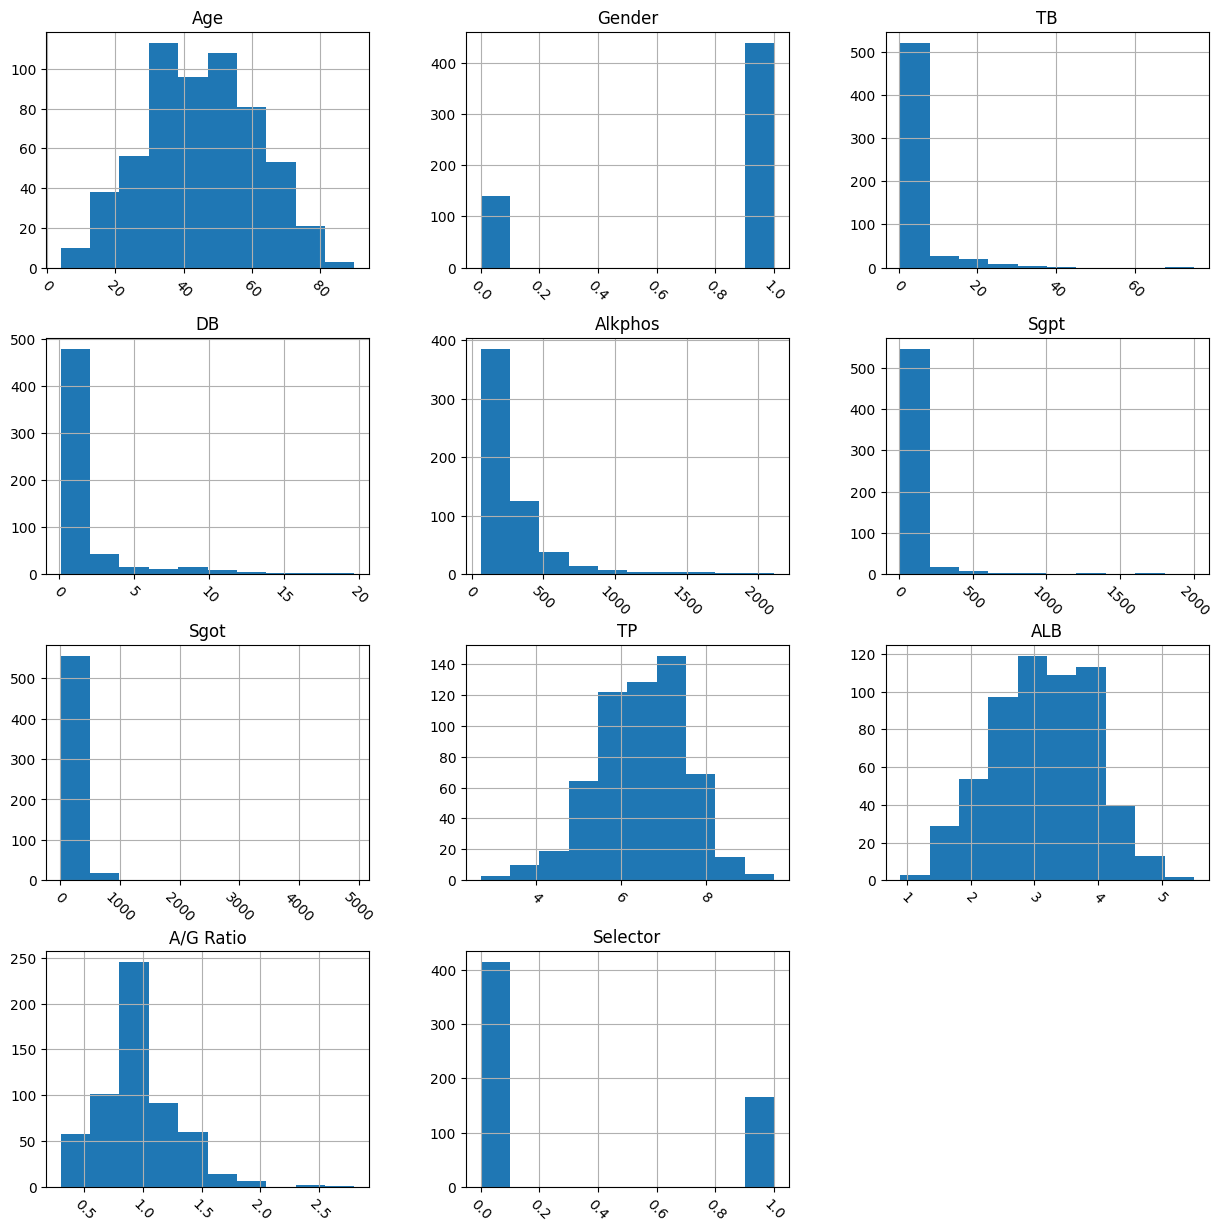

In [17]:
ilpd_df.hist(figsize=(15,15), xrot=-45,bins=10)
plt.show()

##### Split the data into training and testing sets. Create and train models for both Random Forest and Gradient Boosting (including AdaBoost, GBoost, and XGBoost).

In [5]:
label_encoder = LabelEncoder()
ilpd_df['Gender'] = label_encoder.fit_transform(ilpd_df['Gender'])
ilpd_df['Selector'] = label_encoder.fit_transform(ilpd_df['Selector'])

X = ilpd_df.drop('Selector', axis=1)
y = ilpd_df['Selector']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

ada = AdaBoostClassifier(random_state=42)
ada.fit(X_train, y_train)

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

##### Evaluate the performance of each model using Accuracy, Precision, Recall, F1-Score, and ROC-AUC.

In [8]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    start_time = time.time()

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    
    precision_train = precision_score(y_train, y_train_pred)
    precision_test = precision_score(y_test, y_test_pred)
    
    recall_train = recall_score(y_train, y_train_pred)
    recall_test = recall_score(y_test, y_test_pred)
    
    f1_train = f1_score(y_train, y_train_pred)
    f1_test = f1_score(y_test, y_test_pred)
    
    roc_auc_train = roc_auc_score(y_train, model.predict_proba(X_train)[:,1])
    roc_auc_test = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    
    training_time = time.time() - start_time
    
    return {
        'accuracy_train': accuracy_train,
        'accuracy_test': accuracy_test,
        'precision_train': precision_train,
        'precision_test': precision_test,
        'recall_train': recall_train,
        'recall_test': recall_test,
        'f1_train': f1_train,
        'f1_test': f1_test,
        'roc_auc_train': roc_auc_train,
        'roc_auc_test': roc_auc_test,
        'training_time': training_time
    }

rf_results = evaluate_model(rf, X_train, X_test, y_train, y_test)
ada_results = evaluate_model(ada, X_train, X_test, y_train, y_test)
gb_results = evaluate_model(gb, X_train, X_test, y_train, y_test)
xgb_results = evaluate_model(xgb, X_train, X_test, y_train, y_test)

results_df = pd.DataFrame([rf_results, ada_results, gb_results, xgb_results], index=['Random Forest', 'AdaBoost', ' GBoost,', 'XGBoost'])
print(results_df)

               accuracy_train  accuracy_test  precision_train  precision_test  \
Random Forest        1.000000       0.655172         1.000000        0.571429   
AdaBoost             0.768898       0.655172         0.714286        0.666667   
 GBoost,             0.933045       0.689655         0.978947        0.640000   
XGBoost              1.000000       0.672414         1.000000        0.631579   

               recall_train  recall_test  f1_train   f1_test  roc_auc_train  \
Random Forest      1.000000     0.279070  1.000000  0.375000       1.000000   
AdaBoost           0.204918     0.139535  0.318471  0.230769       0.810959   
 GBoost,           0.762295     0.372093  0.857143  0.470588       0.989159   
XGBoost            1.000000     0.279070  1.000000  0.387097       1.000000   

               roc_auc_test  training_time  
Random Forest      0.753903       0.066194  
AdaBoost           0.717904       0.061525  
 GBoost,           0.725709       0.022961  
XGBoost           

In [9]:
iterations = 30

bias_train_rf = []
variance_test_rf = []
bias_train_ada = []
variance_test_ada = []

for _ in range(iterations):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.randint(0, 1000))
    
    rf.fit(X_train, y_train)
    ada.fit(X_train, y_train)
    
    y_train_pred_rf = rf.predict(X_train)
    y_test_pred_rf = rf.predict(X_test)
    
    y_train_pred_ada = ada.predict(X_train)
    y_test_pred_ada = ada.predict(X_test)
    
    bias_train_rf.append(np.mean(np.abs(y_train_pred_rf - y_train)))
    variance_test_rf.append(np.var(y_test_pred_rf))
    
    bias_train_ada.append(np.mean(np.abs(y_train_pred_ada - y_train)))
    variance_test_ada.append(np.var(y_test_pred_ada))

mean_bias_train_rf = np.mean(bias_train_rf)
mean_variance_test_rf = np.mean(variance_test_rf)

mean_bias_train_ada = np.mean(bias_train_ada)
mean_variance_test_ada = np.mean(variance_test_ada)

print(f"RF Bias: {mean_bias_train_rf}, Variance: {mean_variance_test_rf}")
print(f"Ada Bias: {mean_bias_train_ada}, Variance: {mean_variance_test_ada}")

RF Bias: 0.0, Variance: 0.15048057867617917
Ada Bias: 0.2544996400287977, Variance: 0.1333779231074118
